In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


data = pd.read_csv('data.csv')

Data Collection & Processing

In [2]:
print(data.shape)

(1000, 16)


In [3]:
data.head()

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   ela                939 non-null    float64
 2   financeAmount      939 non-null    float64
 3   address1           998 non-null    object 
 4   address2           862 non-null    object 
 5   address3           416 non-null    object 
 6   state              1000 non-null   object 
 7   city               1000 non-null   object 
 8   postcode           976 non-null    float64
 9   applicationStatus  1000 non-null   object 
 10  netSalary          1000 non-null   float64
 11  loanTenure         1000 non-null   int64  
 12  interestRate       1000 non-null   int64  
 13  loanApplied        1000 non-null   int64  
 14  jobTitle           1000 non-null   object 
 15  loanReason         1000 non-null   object 
dtypes: float64(4), int64(3), 

In [5]:
data.describe()

,ela,financeAmount,postcode,netSalary,loanTenure,interestRate,loanApplied
count,939.000000,939.000000,976.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15959.531416,3532.694356,47655.150615,3457.413940,21.990000,17.997000,5581.600000
std,24027.757185,3351.043863,27143.513917,11434.249677,4.614021,0.094868,3255.973403
min,0.000000,0.000000,1000.000000,450.000000,6.000000,15.000000,1000.000000
25%,1000.000000,1000.000000,26092.500000,1990.442500,24.000000,18.000000,3000.000000
50%,11000.000000,2500.000000,43900.000000,2676.085000,24.000000,18.000000,5000.000000
75%,22000.000000,5000.000000,71800.000000,3700.000000,24.000000,18.000000,10000.000000
max,397000.000000,10000.000000,98000.000000,359313.000000,24.000000,18.000000,10000.000000


In [6]:
data.isnull().sum()

id                     0
ela                   61
financeAmount         61
address1               2
address2             138
address3             584
state                  0
city                   0
postcode              24
applicationStatus      0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
jobTitle               0
loanReason             0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

id                   0
ela                  0
financeAmount        0
address1             0
address2             0
address3             0
state                0
city                 0
postcode             0
applicationStatus    0
netSalary            0
loanTenure           0
interestRate         0
loanApplied          0
jobTitle             0
loanReason           0
dtype: int64

In [9]:
# Label encoding
data.replace({"applicationStatus":{'REJECTED':0, 'APPROVED':1}}, inplace=True)

<ipython-input-9-cbfb811e0380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"applicationStatus":{'REJECTED':0, 'APPROVED':1}}, inplace=True)


Data Visualization

<Axes: xlabel='loanReason', ylabel='count'>

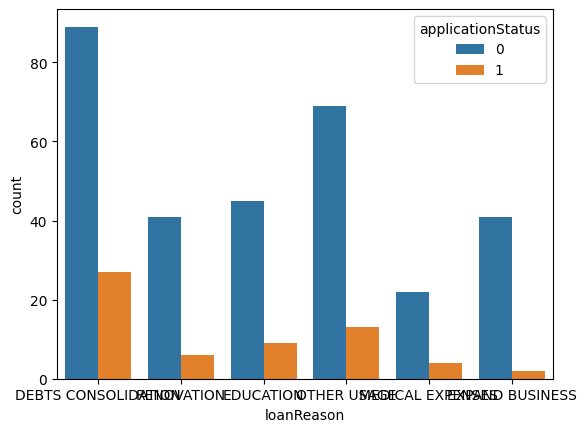

In [10]:
sns.countplot(x='loanReason',hue='applicationStatus',data=data)

In [11]:
# Convert categorical column to numerical values
data.replace({'loanReason':{'DEBTS CONSOLIDATION':0,'RENOVATION':1,'EDUCATION':2,'OTHER USAGE':3,'MEDICAL EXPENSES':4,'EXPAND BUSINESS':5}}, inplace = True)

In [12]:
label_encoders = {}
le = LabelEncoder()
data['jobTitle'] = le.fit_transform(data['jobTitle'])
label_encoders['jobTitle'] = le

In [13]:
# Separate features and target variable
X = data.drop(columns=['id', 'address1', 'address2', 'address3', 'state', 'city', 'postcode', 'applicationStatus'], axis=1)
y = data['applicationStatus']

<Axes: >

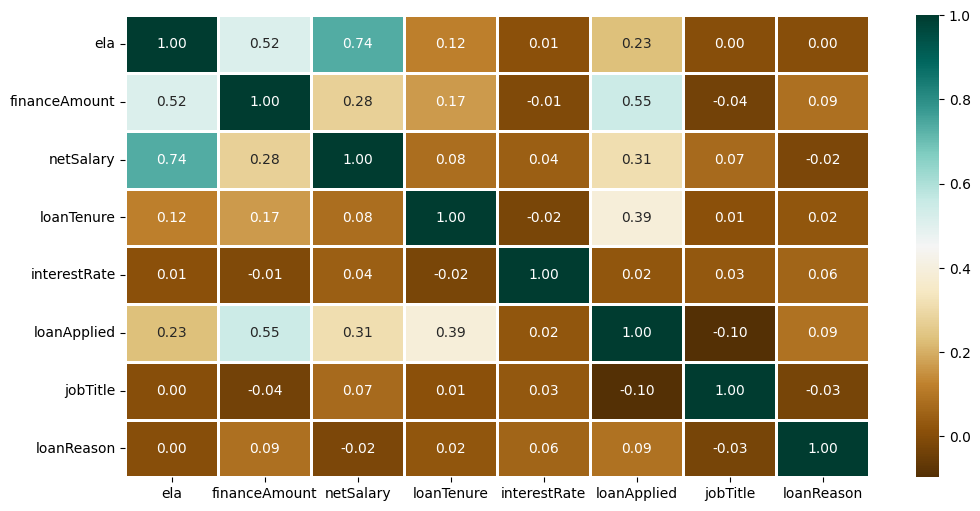

In [14]:
plt.figure(figsize=(12,6))

sns.heatmap(X.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Training and evaluate the models

In [16]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
lc = LogisticRegression()
dtc = DecisionTreeClassifier()
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()


# Predictions on test set
for models in (rfc, knn, svc, lc, dtc, lda, nb):
    models.fit(X_train, y_train)
    Y_pred = models.predict(X_test)
    print("Accuracy score of", models.__class__.__name__, "=", metrics.accuracy_score(y_test, Y_pred))
    print("Precision score of", models.__class__.__name__, "=", metrics.precision_score(y_test, Y_pred))
    print("Recall score of", models.__class__.__name__, "=", metrics.recall_score(y_test, Y_pred))
    print("F1 score of", models.__class__.__name__, "=", metrics.f1_score(y_test, Y_pred))
    print("")



Accuracy score of RandomForestClassifier = 0.918918918918919
Precision score of RandomForestClassifier = 0.6
Recall score of RandomForestClassifier = 0.42857142857142855
F1 score of RandomForestClassifier = 0.5

Accuracy score of KNeighborsClassifier = 0.9324324324324325
Precision score of KNeighborsClassifier = 0.75
Recall score of KNeighborsClassifier = 0.42857142857142855
F1 score of KNeighborsClassifier = 0.5454545454545454

Accuracy score of SVC = 0.9054054054054054
Precision score of SVC = 0.0
Recall score of SVC = 0.0
F1 score of SVC = 0.0

Accuracy score of LogisticRegression = 0.9054054054054054
Precision score of LogisticRegression = 0.0
Recall score of LogisticRegression = 0.0
F1 score of LogisticRegression = 0.0

Accuracy score of DecisionTreeClassifier = 0.8648648648648649
Precision score of DecisionTreeClassifier = 0.38461538461538464
Recall score of DecisionTreeClassifier = 0.7142857142857143
F1 score of DecisionTreeClassifier = 0.5

Accuracy score of LinearDiscriminantA

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division